In [1]:
import os
from utils.RecommenderSystem import RecommenderSystem  
import pandas as pd
from unidecode import unidecode 
from tqdm import tqdm  
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np 
import matplotlib.pyplot as plt
# Assuming RS.vectorized_corpus is a DataFrame with the dataset
from matplotlib.colors import ListedColormap

from sklearn.manifold import TSNE 

train_path = 'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\marzo.csv'
test_path =  'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\abril.csv'

train = pd.read_csv(train_path) 
test = pd.read_csv(test_path)

RS = RecommenderSystem(train,test,save_path=  os.getcwd())

Initializing Recommender System
The current directory is c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\hito_4
Using GPU: NVIDIA GeForce RTX 3060
Initializing User Space
Directory 'c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\hito_4\userspace_data' created or already exists.
['BERT_model.pkl', 'BERT_tokenizer.pkl', 'kmeans_clusters.csv', 'kmeans_model.pkl', 'vectorized_corpus.csv']
All necesary files have been found.
Loaded cluster model
Loaded BERT_model
Loaded tokenizer
Loaded vectorized data
Loaded kmeans data


In [2]:
colors_hex = ['#c9d8cb', '#89985c', '#50624c','#dfdb55','#c1fd9f']

def clusterization_study(data: pd.DataFrame, 
                         n_clusters:int = None,
                         elbow_range: np.linspace = np.linspace(5,35,dtype = int),
                         colormap: str or list = '',
                         figsize = (10,10)):
    
    colormap = ListedColormap(colors_hex)
    if n_clusters is None:
        inertia = []

        # Perform K-Means clustering for different values of k
        for n_clusters in tqdm(elbow_range,desc='testing clusters in elbow method'):
            kmeans = KMeans(n_clusters=n_clusters,n_init=10)
            kmeans.fit(data)
            inertia.append(kmeans.inertia_)

        # Create the Elbow Method graph
        plt.figure()
        plt.plot(elbow_range, inertia, marker='o')
        plt.title('Elbow Method for Optimal K')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Variance Explained (Inertia)')
        plt.grid(True)
        plt.show()
        variation = [(inertia[i] - inertia[i+1])/ inertia[i] * 100 for i in range(len(inertia)-1)]
        n_clusters = elbow_range[variation.index(max(variation)) + 1]
        print(f"Optimal n_clusters is {int(n_clusters)}")
     
    X_std = data

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_std)

    # Apply Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg.fit_predict(X_std)

    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_std)

    # Evaluate clustering using silhouette score
    print("\nSilhouette Scores:")
    print("KMeans:", silhouette_score(X_std, kmeans_labels))
    print("Agglomerative Clustering:", silhouette_score(X_std, agg_labels))

    # Visualize clusters using PCA (assuming 2D data for visualization)
    pca = TSNE(n_components=3)
    X_pca = pca.fit_transform(X_std)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    # Visualize KMeans clusters
    axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap=colormap, marker='.', s=20)
    axes[0, 0].set_title('KMeans Clustering')

    # Visualize Agglomerative Clustering clusters
    axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap=colormap, marker='.', s=20)
    axes[0, 1].set_title('Agglomerative Clustering')

    # Plot dendrogram for Agglomerative Clustering
    axes[1, 0].set_axis_off()

    # Visualize DBSCAN clusters
    axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap=colormap, marker='.', s=20)
    axes[1, 1].set_title('DBSCAN')

    plt.show()


    # Create a 2x2 grid for the plots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    # Visualize KMeans clusters in 3D
    axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_labels, cmap=colormap)
    axes[0, 0].set_title('KMeans Clustering')

    # Visualize Agglomerative Clustering clusters in 3D
    axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=agg_labels, cmap=colormap)
    axes[0, 1].set_title('Agglomerative Clustering')

    # Plot dendrogram for Agglomerative Clustering
    linked = linkage(X_std, 'ward')
    dendrogram(linked, ax=axes[1, 0], orientation='top', distance_sort='descending', show_leaf_counts=True)
    axes[1, 0].set_title('Agglomerative Dendrogram')

    # Visualize DBSCAN clusters in 3D
    axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=dbscan_labels, cmap=colormap)
    axes[1, 1].set_title('DBSCAN')

    plt.show()

    # Set up the 3D scatter plot grid
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    ax3 = fig.add_subplot(2, 2, 3)

    # Visualize KMeans clusters in 3D
    ax1.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_labels, cmap=colormap)
    ax1.set_title('KMeans Clustering')

    # Visualize Agglomerative Clustering clusters in 3D
    ax2.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=agg_labels, cmap=colormap)
    ax2.set_title('Agglomerative Clustering')

    # Plot dendrogram for Agglomerative Clustering
    ax3.set_axis_off()
    linked = linkage(X_std, 'ward')
    dendrogram(linked, ax=ax3, orientation='top', distance_sort='descending', show_leaf_counts=True)
    ax3.set_title('Agglomerative Dendrogram')

    # Visualize DBSCAN clusters in 3D
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax4.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=dbscan_labels, cmap=colormap)
    ax4.set_title('DBSCAN')

    plt.show()
    #return X_pca

testing clusters in elbow method:   0%|          | 0/50 [00:00<?, ?it/s]

testing clusters in elbow method: 100%|██████████| 50/50 [01:02<00:00,  1.24s/it]


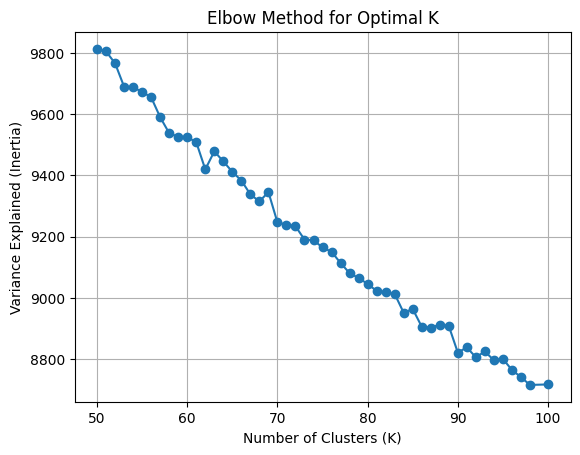

Optimal n_clusters is 70

Silhouette Scores:
KMeans: 0.054418250789565616
Agglomerative Clustering: 0.05101621582447945


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


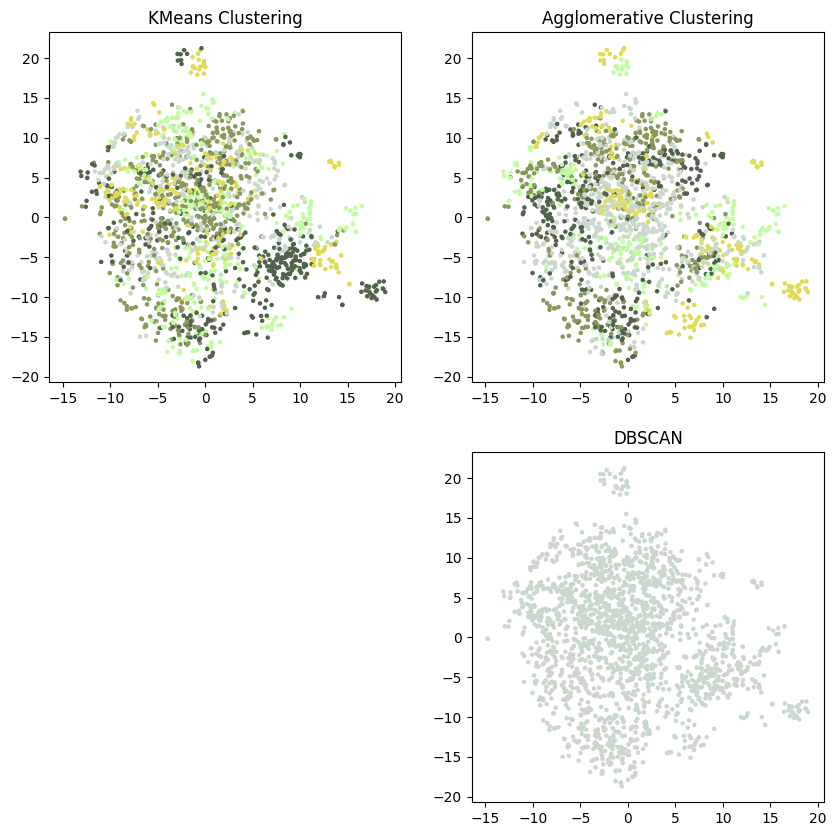

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


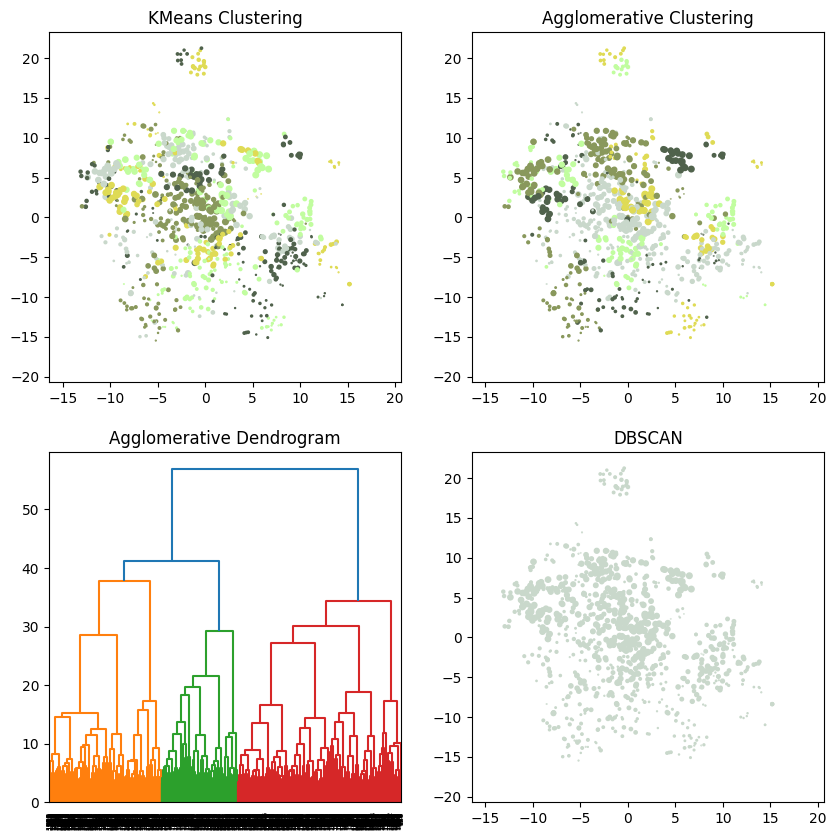

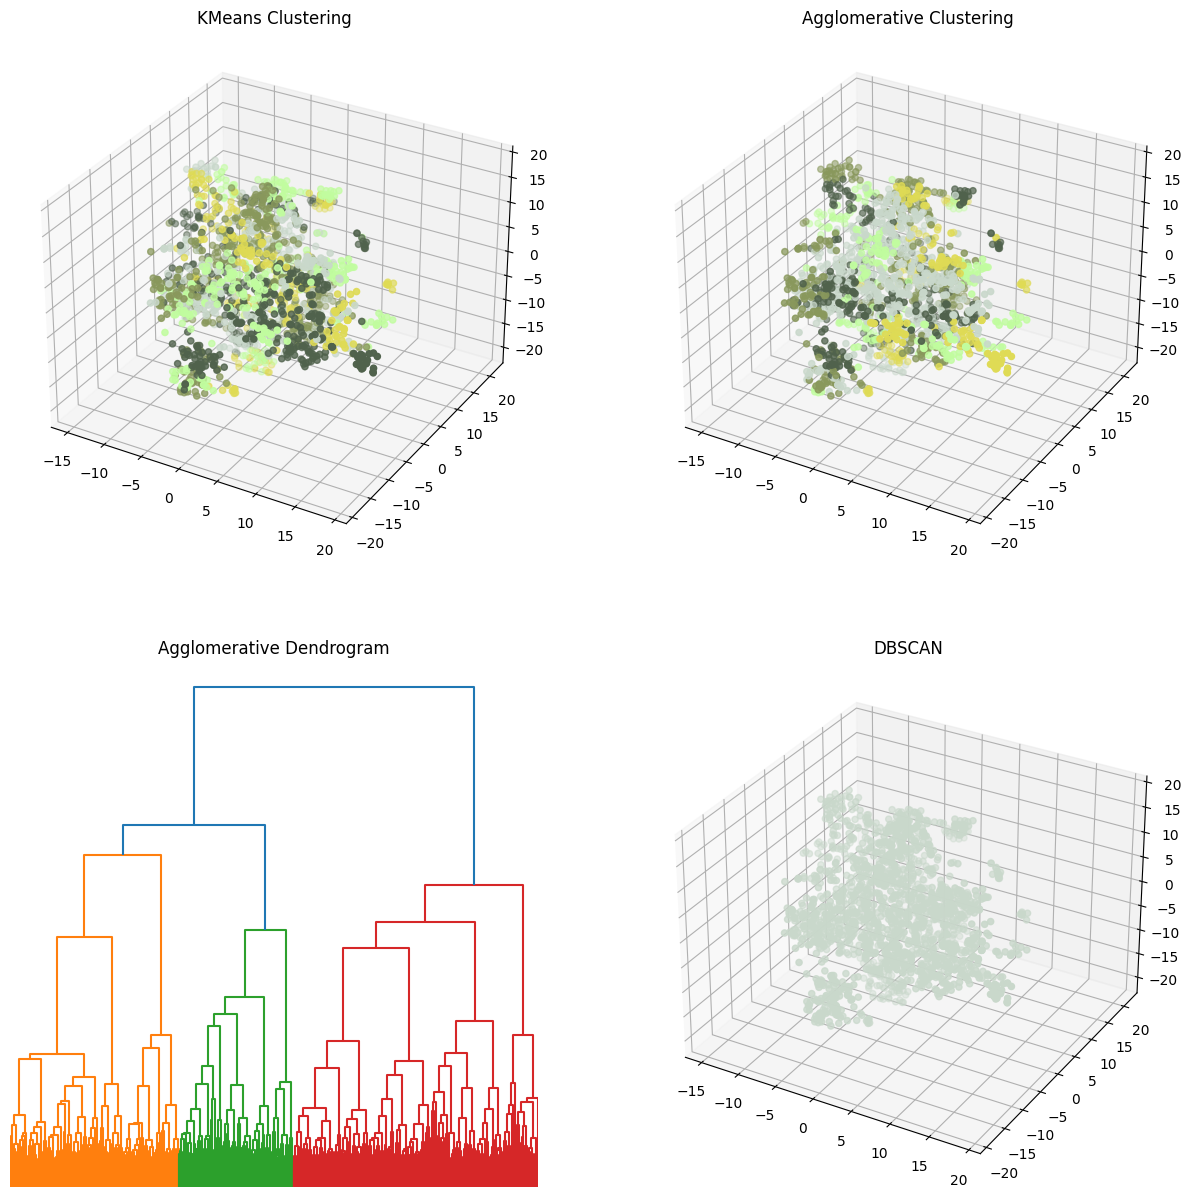

In [3]:
%matplotlib inline
clusterization_study(RS.vectorized_corpus,
                     #n_clusters= 100,
                     elbow_range=np.linspace(50,100,dtype =int),
                     colormap=colors_hex)

finding optimal cluster number: 100%|██████████| 91/91 [01:35<00:00,  1.05s/it]

Optimal number of clusters for KMeans: 12


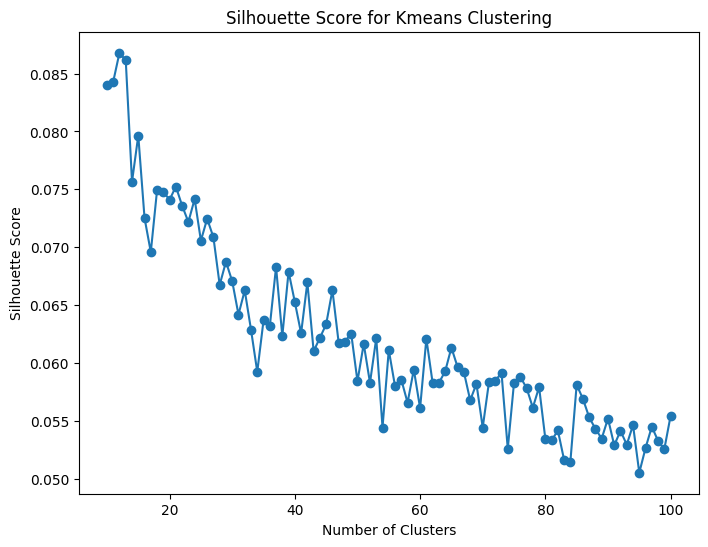

finding optimal cluster number: 100%|██████████| 91/91 [00:56<00:00,  1.60it/s]

Optimal number of clusters for Agglomerative Clustering: 13


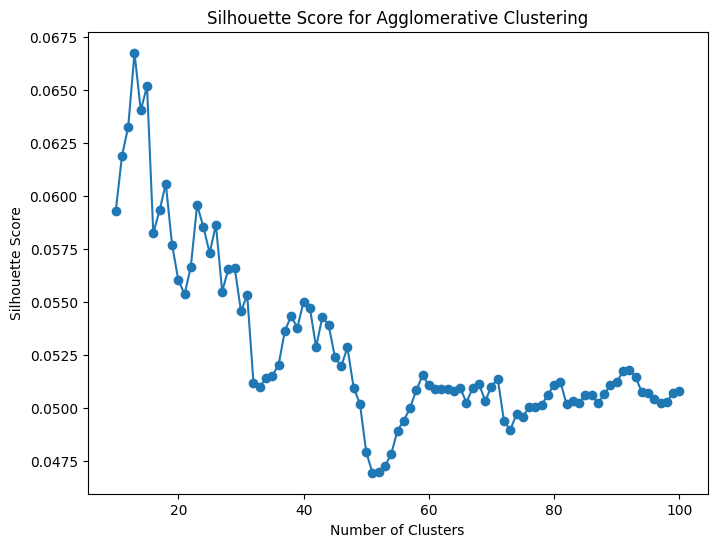


Silhouette Scores:
KMeans: 0.08680626591721613
Agglomerative Clustering: 0.06677149914313


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


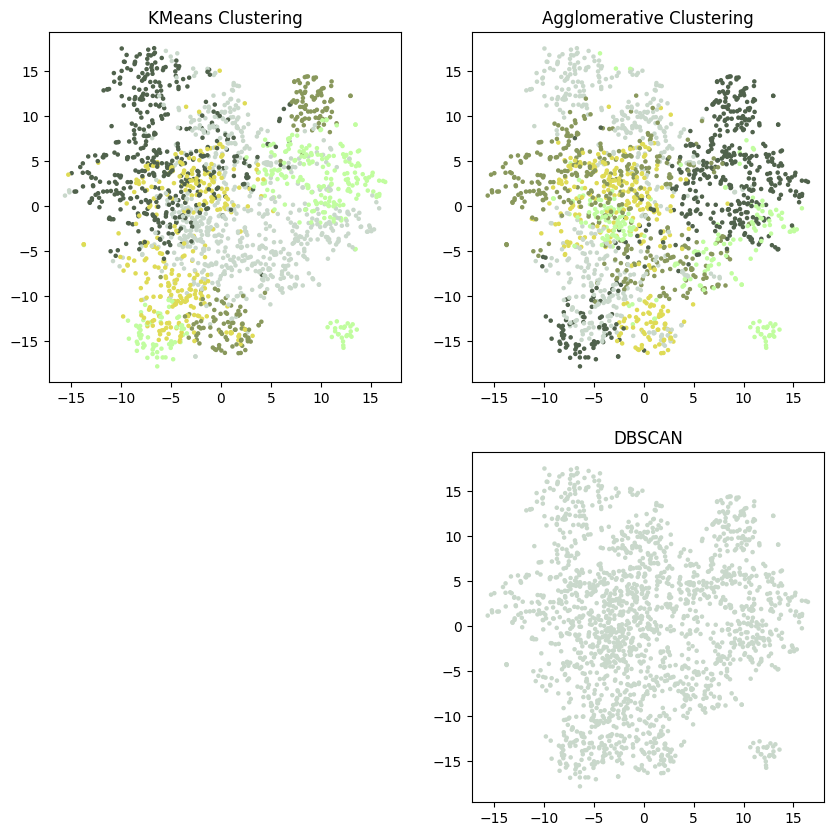

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


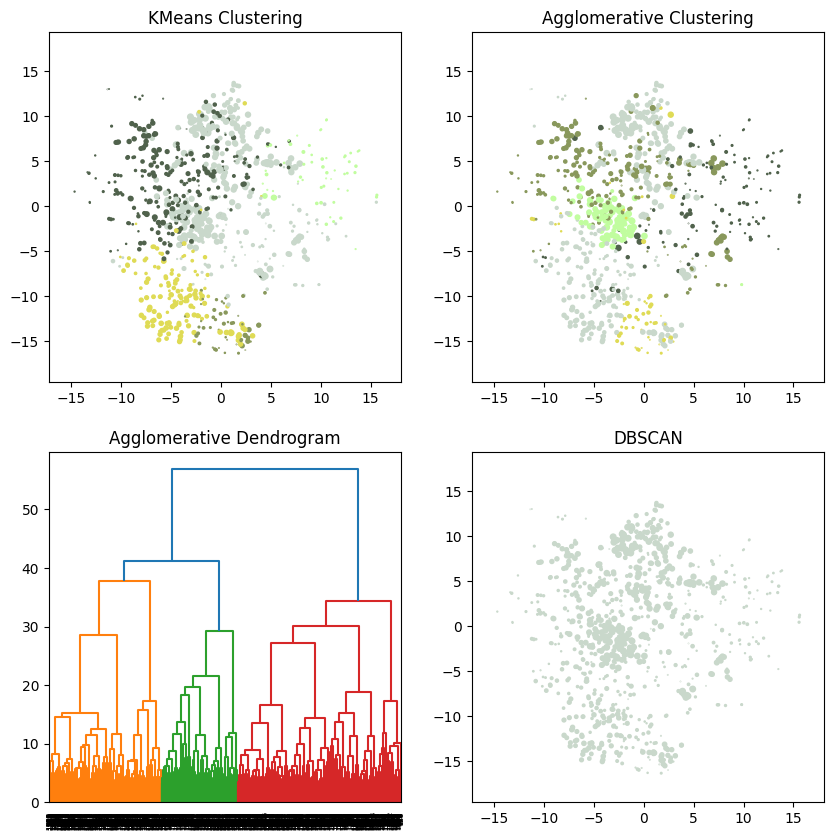

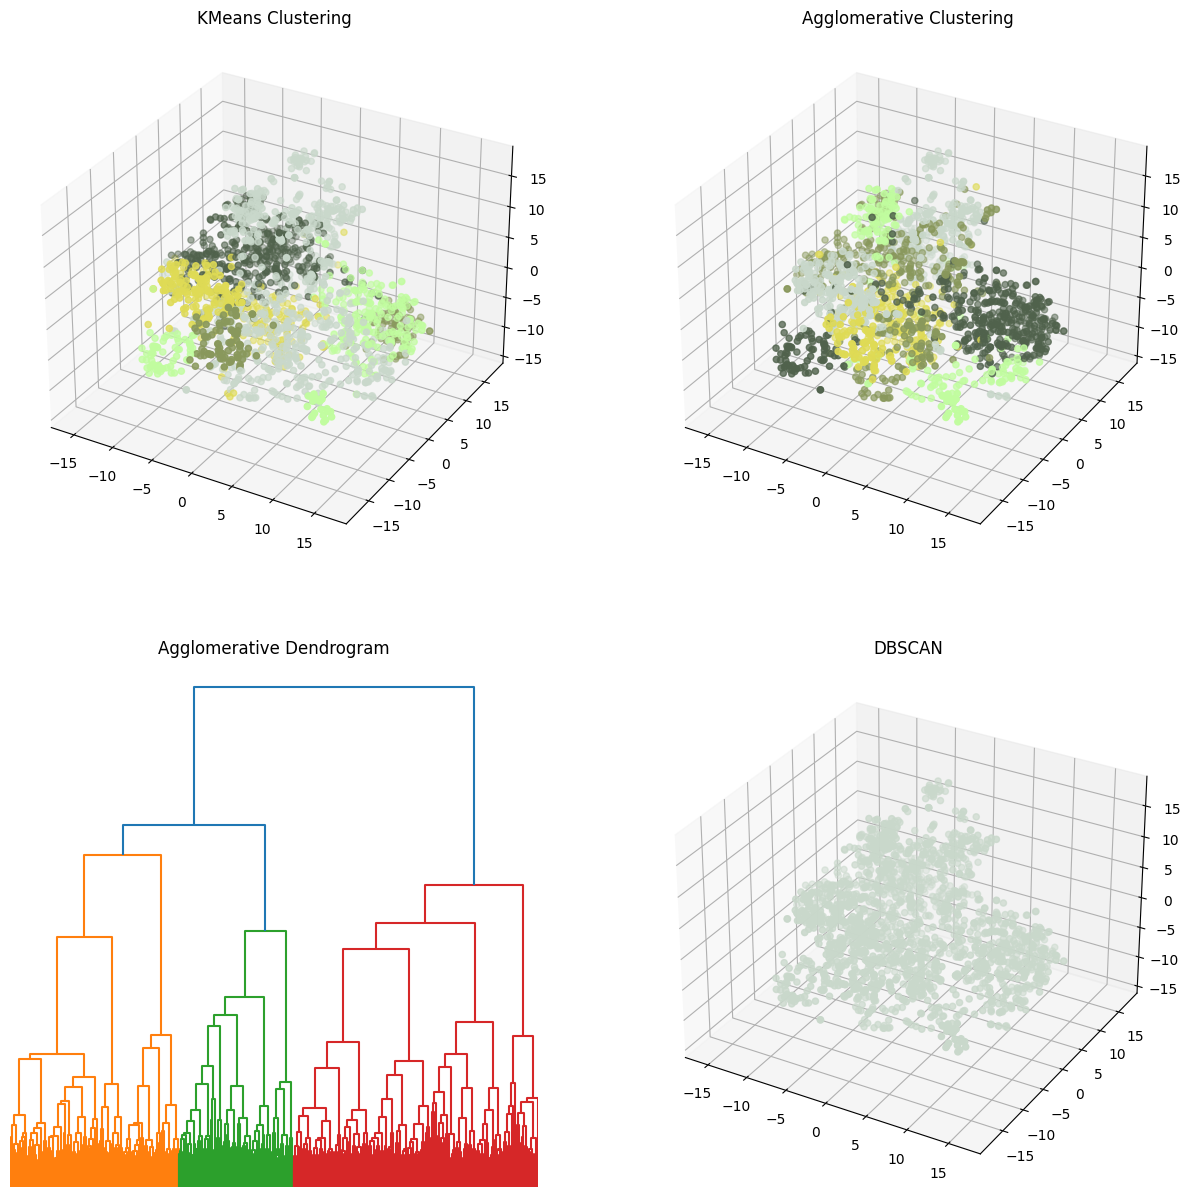

In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def find_optimal_clusters(data, max_clusters, algorithm='kmeans'):
    silhouette_scores = []
    cluster_range = range(10, max_clusters + 1)

    for n_clusters in tqdm(cluster_range,desc = 'finding optimal cluster number'):
        if algorithm == 'kmeans':
            clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        elif algorithm == 'agglomerative':
            clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        else:
            raise ValueError("Invalid algorithm. Choose 'kmeans' or 'agglomerative'.")

        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
    return optimal_clusters, silhouette_scores

def plot_silhouette_scores(cluster_range, silhouette_scores, algorithm):
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title(f'Silhouette Score for {algorithm.capitalize()} Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Example usage with a dataset (replace 'your_dataset.csv' with your actual dataset file)
# Ensure that your dataset is in a format that scikit-learn can handle (e.g., NumPy array or pandas DataFrame)
# For demonstration purposes, I'm using a random dataset here.
data = RS.vectorized_corpus




# Set the maximum number of clusters to test
max_clusters_to_test = 100

# KMeans
optimal_kmeans_clusters, kmeans_silhouette_scores = find_optimal_clusters(data, max_clusters_to_test, algorithm='kmeans')
print(f'Optimal number of clusters for KMeans: {optimal_kmeans_clusters}')
plot_silhouette_scores(range(10, max_clusters_to_test + 1), kmeans_silhouette_scores, 'kmeans')

# Agglomerative Clustering
optimal_agg_clusters, agg_silhouette_scores = find_optimal_clusters(data, max_clusters_to_test, algorithm='agglomerative')
print(f'Optimal number of clusters for Agglomerative Clustering: {optimal_agg_clusters}')
plot_silhouette_scores(range(10, max_clusters_to_test + 1), agg_silhouette_scores, 'agglomerative')

X_std = data 

colormap = ListedColormap(colors_hex)
figsize = (10,10)
# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_kmeans_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_std)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=optimal_agg_clusters)
agg_labels = agg.fit_predict(X_std)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_std)

# Evaluate clustering using silhouette score
print("\nSilhouette Scores:")
print("KMeans:", silhouette_score(X_std, kmeans_labels))
print("Agglomerative Clustering:", silhouette_score(X_std, agg_labels))

# Visualize clusters using PCA (assuming 2D data for visualization)
pca = TSNE(n_components=3)
X_pca = pca.fit_transform(X_std)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)

# Visualize KMeans clusters
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap=colormap, marker='.', s=20)
axes[0, 0].set_title('KMeans Clustering')

# Visualize Agglomerative Clustering clusters
axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap=colormap, marker='.', s=20)
axes[0, 1].set_title('Agglomerative Clustering')

# Plot dendrogram for Agglomerative Clustering
axes[1, 0].set_axis_off()

# Visualize DBSCAN clusters
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap=colormap, marker='.', s=20)
axes[1, 1].set_title('DBSCAN')

plt.show()


# Create a 2x2 grid for the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)

# Visualize KMeans clusters in 3D
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_labels, cmap=colormap)
axes[0, 0].set_title('KMeans Clustering')

# Visualize Agglomerative Clustering clusters in 3D
axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=agg_labels, cmap=colormap)
axes[0, 1].set_title('Agglomerative Clustering')

# Plot dendrogram for Agglomerative Clustering
linked = linkage(X_std, 'ward')
dendrogram(linked, ax=axes[1, 0], orientation='top', distance_sort='descending', show_leaf_counts=True)
axes[1, 0].set_title('Agglomerative Dendrogram')

# Visualize DBSCAN clusters in 3D
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=dbscan_labels, cmap=colormap)
axes[1, 1].set_title('DBSCAN')

plt.show()

# Set up the 3D scatter plot grid
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3)

# Visualize KMeans clusters in 3D
ax1.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_labels, cmap=colormap)
ax1.set_title('KMeans Clustering')

# Visualize Agglomerative Clustering clusters in 3D
ax2.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=agg_labels, cmap=colormap)
ax2.set_title('Agglomerative Clustering')

# Plot dendrogram for Agglomerative Clustering
ax3.set_axis_off()
linked = linkage(X_std, 'ward')
dendrogram(linked, ax=ax3, orientation='top', distance_sort='descending', show_leaf_counts=True)
ax3.set_title('Agglomerative Dendrogram')

# Visualize DBSCAN clusters in 3D
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=dbscan_labels, cmap=colormap)
ax4.set_title('DBSCAN')

plt.show()

